In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [21]:
heights = []

with open("/content/sample_data/Heights.txt", "r") as f:
    heights = list(map(float, f.read().split("\n")))
    heights = [i for i in heights if i >= 160.0 and i <= 190.0]

heights = np.array(heights)
n = len(heights)
edges = np.linspace(160, 190, 13)

heights

array([179.163, 166.702, 181.815, 167.206, 174.854, 169.738, 168.47 ,
       180.236, 176.722, 176.455, 177.344, 170.695, 175.939, 164.106,
       183.037, 176.173, 168.189, 174.939, 187.151, 172.712, 188.08 ,
       171.395, 164.81 , 175.362, 170.083, 172.432, 176.225, 167.631,
       181.852, 182.829, 166.862, 161.826, 178.178, 175.241, 174.202,
       168.929, 180.279, 171.381, 175.875, 176.935, 175.604, 183.044,
       177.033, 179.088, 173.497, 169.5  , 170.494, 168.836, 179.376,
       168.221, 174.37 , 186.996, 174.862, 169.347, 183.055, 172.964,
       170.237, 171.735, 179.53 , 172.084, 170.05 , 165.797, 174.208,
       173.33 , 174.641, 180.662, 184.155, 174.495, 168.282, 173.383,
       182.816, 182.424, 166.837, 168.028, 179.424, 179.151, 165.347,
       172.089, 180.628, 170.822, 181.821, 172.819, 177.507, 184.442,
       178.22 , 171.077, 172.183, 169.296, 179.714, 172.953, 168.173,
       169.218, 173.257, 174.993, 169.071, 179.644, 173.757, 174.521,
       166.249, 174.

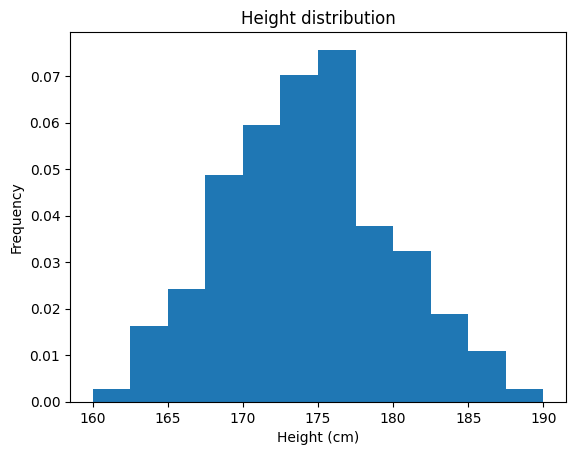

In [22]:
plt.hist(heights, edges, density=True)
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.title('Height distribution')
plt.show()

In [23]:
heights_mean = np.mean(heights)
heights_var = np.var(heights, ddof=1)

print("Выборочное среднее:", heights_mean)
print("Выборочная дисперсия", heights_var)

Выборочное среднее: 174.35241891891891
Выборочная дисперсия 30.89405296617027


In [24]:
std_dev = np.std(heights, ddof=1)

print("Стандартное отклонение:", std_dev)

Стандартное отклонение: 5.558241895255214


In [25]:
gamma = 0.95

print("Уровень доверия: {:4.2%}".format(gamma))

Уровень доверия: 95.00%


In [26]:
conf_interval_E = scipy.stats.t.interval(gamma,
                                         df=n-1,
                                         loc=heights_mean,
                                         scale=std_dev/((n)**0.5))

print(f"Интервальная оценка для математического ожидания: {conf_interval_E}")

Интервальная оценка для математического ожидания: (173.4495082169535, 175.25532962088434)


In [27]:
lower_bound = (n - 1) * heights_var / scipy.stats.chi2.ppf((1 + gamma) / 2, df=n-1)
upper_bound = (n - 1) * heights_var / scipy.stats.chi2.ppf((1 - gamma) / 2, df=n-1)

conf_interval_V = (lower_bound, upper_bound)

print(f"Интервальная оценка для дисперсии: {conf_interval_V}")

Интервальная оценка для дисперсии: (24.890141243109706, 39.37900475029282)


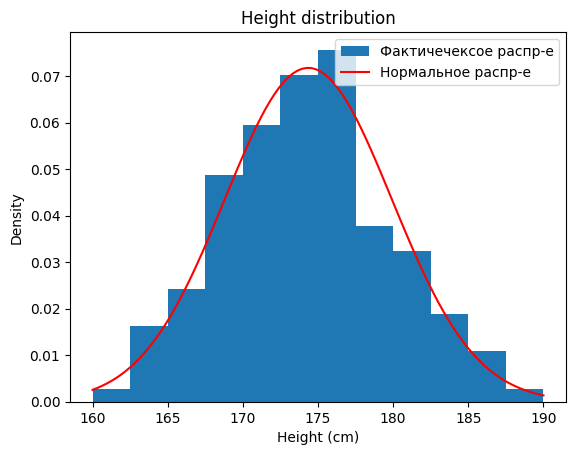

In [28]:
observed, _, _ = plt.hist(heights, edges, density=True, label="Фактичечексое распр-е")

# Для графика
pdf = scipy.stats.norm.pdf(np.linspace(160, 190, 100),
                           loc=heights_mean,
                           scale=np.sqrt(heights_var))

# Для сравнения распределений
expected = scipy.stats.norm.pdf(np.linspace(160, 190, 12),
                                loc=heights_mean,
                                scale=np.sqrt(heights_var))
expected = np.sum(observed) / np.sum(expected) * expected

plt.plot(np.linspace(160, 190, 100), pdf, c="r", label="Нормальное распр-е")

plt.xlabel('Height (cm)')
plt.ylabel('Density')
plt.title('Height distribution')
plt.legend()
plt.show()

In [29]:
chi2, p = scipy.stats.chisquare(observed, expected, ddof=2)

print("Статистика хи-квадрат: {:.2f}, p: {:.4f}".format(chi2, p))

Статистика хи-квадрат: 0.02, p: 1.0000


In [30]:
alpha = 0.05

if p < alpha:
    print("Отвергаем гипотезу о соответствии распределения роста студентов заданному закону распределения.")
else:
    print("Не отвергаем гипотезу о соответствии распределения роста студентов заданному закону распределения.")

Не отвергаем гипотезу о соответствии распределения роста студентов заданному закону распределения.
